In [10]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

In [3]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
#hyper-parameters
num_inputs, num_outputs, num_hidden = 28 * 28, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hidden))
b1 = nd.zeros(num_hidden)
W2 = nd.random.normal(scale=0.01, shape=(num_hidden, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

In [5]:
def relu(X):
    return nd.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

loss = gloss.SoftmaxCrossEntropyLoss()

In [6]:
num_epochs, lr = 5, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.7829, train acc 0.709, test acc 0.822
epoch 2, loss 0.4884, train acc 0.818, test acc 0.849
epoch 3, loss 0.4264, train acc 0.842, test acc 0.860
epoch 4, loss 0.3967, train acc 0.854, test acc 0.865
epoch 5, loss 0.3681, train acc 0.864, test acc 0.859


shapes: 
X.shape (1, 28, 28), y.shape (1,)
predicted results: 



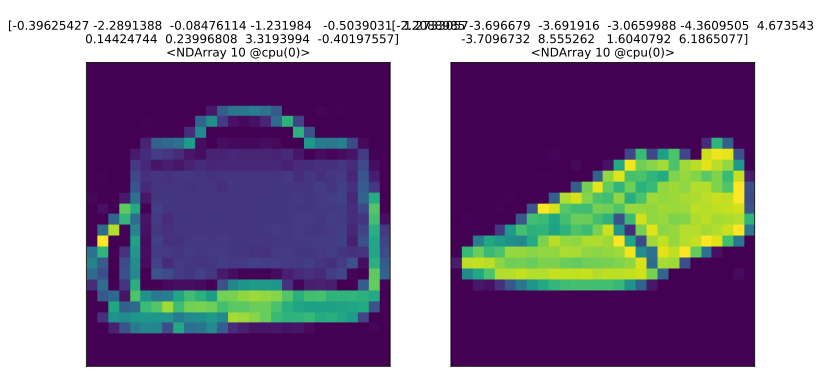

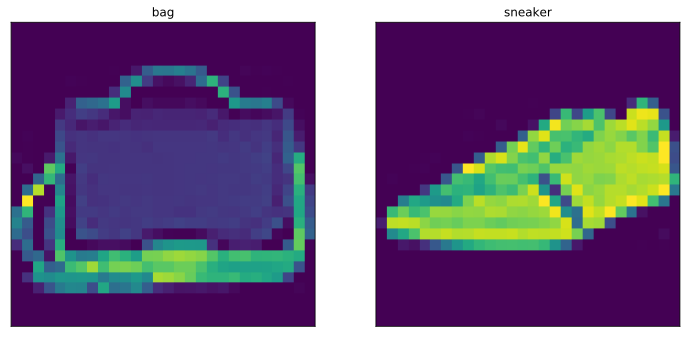

In [51]:
for X, y in train_iter:
    
    print(f'shapes: \nX.shape {X[0].shape}, y.shape {y[:1].shape}')
    print(f'predicted results: \n')

    d2l.show_fashion_mnist(X[:2], net(X[:2]))
    d2l.show_fashion_mnist(X[:2], d2l.get_fashion_mnist_labels(y[:2].asnumpy()))
    
    break
    